In [ ]:
import pandas as pd
names = ['age','sex','cp','trestbps','chol','fbs','restecg',
         'thalach','exang','oldpeak','slope','ca','thal','num'
]
data = pd.read_csv('processed.cleveland.data',names=names)

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


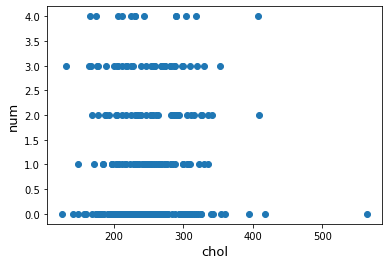

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(x = data['chol'], y = data['num'])
plt.ylabel('num', fontsize=13)
plt.xlabel('chol', fontsize=13)
plt.show()

(array([164.,   0.,  55.,   0.,   0.,  36.,   0.,  35.,   0.,  13.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

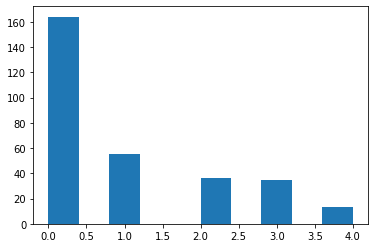

In [ ]:
plt.hist(data['num'])

In [ ]:
#Check for missing data entries


percent_missing=[]
names1=[]
for name in data:
  column = data[name]
  subset = column[column=='?']
  percent_missing.append(len(subset)/len(data[name]))
  names1.append(name)
percent_missing.sort(reverse=True)
missing_data = pd.DataFrame({'Missing Ratio' :percent_missing})
missing_data.head(20)
  

,Missing Ratio
0,0.013201
1,0.006601
2,0.000000
3,0.000000
4,0.000000
5,0.000000
6,0.000000
7,0.000000
8,0.000000
9,0.000000


In [ ]:
data=data.drop(data[(data['ca']=='?') | (data['thal']=='?')].index)
data['thal'] = data['thal'].astype('float')
data['ca'] = data['ca'].astype('float')
print(data.dtypes)

x = data.drop('num',axis=1)

y = data.num
print(y)

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object
0      0
1      2
2      1
3      0
4      0
      ..
297    1
298    1
299    2
300    3
301    1
Name: num, Length: 297, dtype: int64


In [ ]:
y.replace({2: 1}, inplace=True)
y.replace({3: 1}, inplace=True)
y.replace({4: 1}, inplace=True)
print(y)

0      0
1      1
2      1
3      0
4      0
      ..
297    1
298    1
299    1
300    1
301    1
Name: num, Length: 297, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

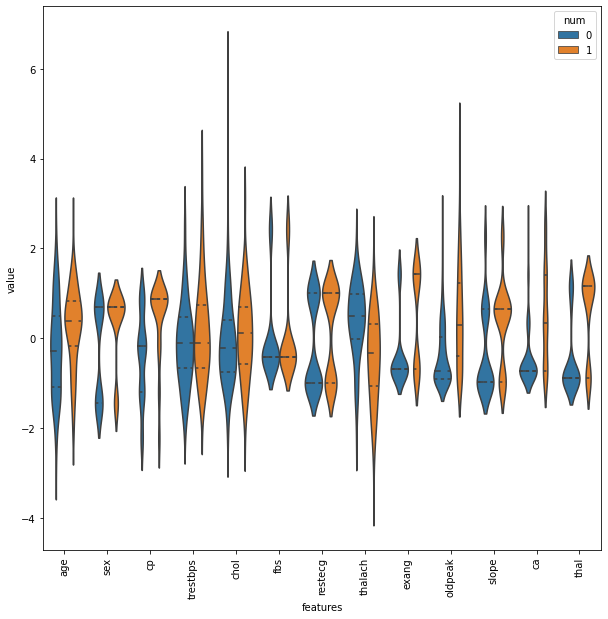

In [ ]:
# Visualising the distributions and differences of absense and presents
# of heart disease
import pandas as pd
import seaborn as sns
data_dia = y
datax = x
data_n_2 = (datax - datax.mean()) / (datax.std())              # standardization
datax = pd.concat([y,data_n_2.iloc[:,:]],axis=1)
datax = pd.melt(datax,id_vars="num",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="num", data=datax, inner="quart")
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 26.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 95.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 90.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 44.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 32.0% of the points cannot be placed; y

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

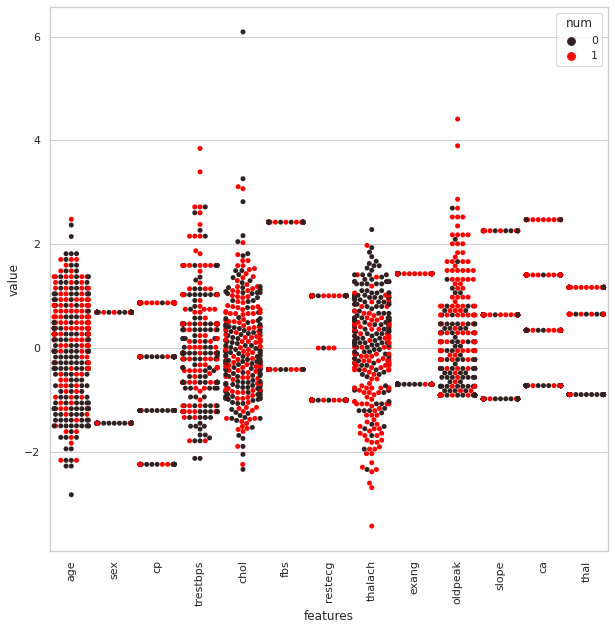

In [ ]:
import time
sns.set(style="whitegrid", palette="muted")
data_dia = y
datax = x
data_n_2 = (datax - datax.mean()) / (datax.std())              # standardization
datax = pd.concat([y,data_n_2.iloc[:,:]],axis=1)
datax = pd.melt(datax,id_vars="num",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="num", data=datax,color='red')

plt.xticks(rotation=90)

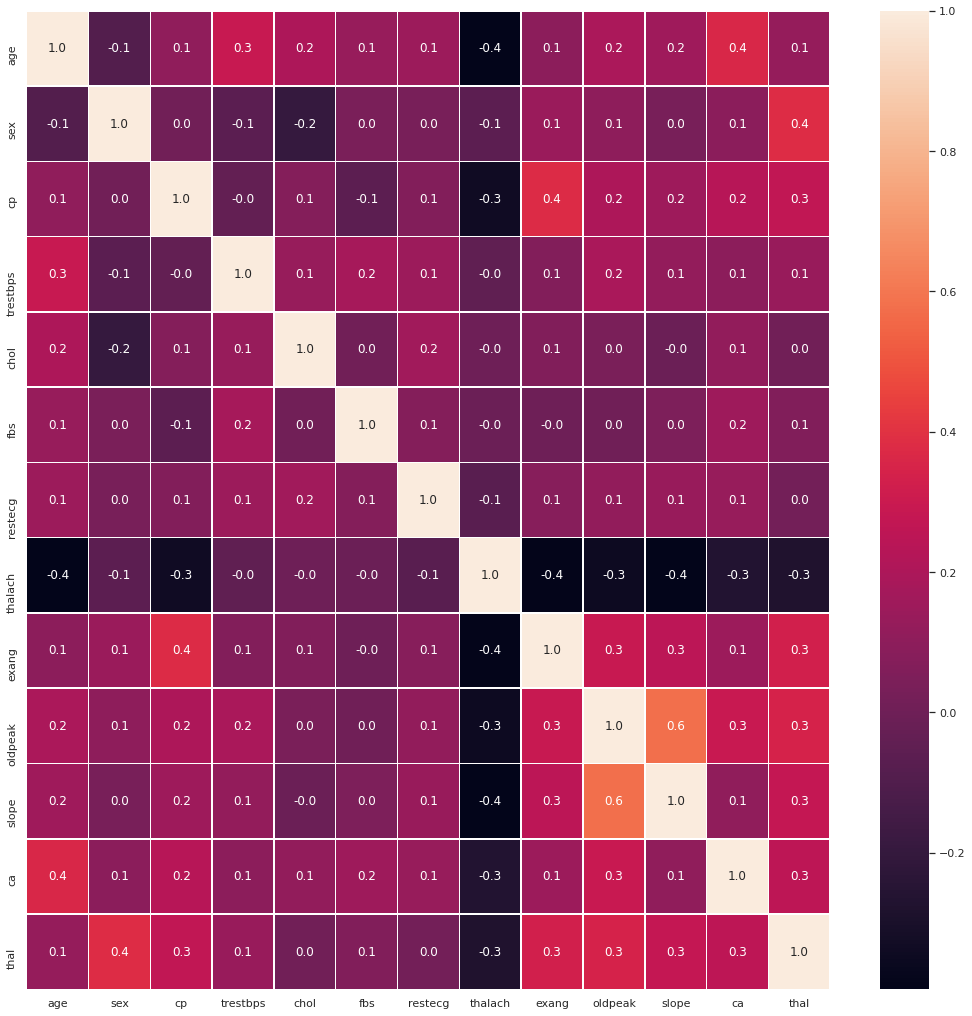

In [ ]:
# Visualizing the correlations between variables
_,_ = plt.subplots(figsize=(18, 18))
#print(ax)
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f')#,ax=ax)

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
X = StandardScaler().fit_transform(x)
lc = LabelEncoder()
#Y = lc.fit_transform(y)
#print(Y)
#print(y)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(x_train.shape,x_test.shape)

(222, 13) (75, 13)


In [ ]:
from pandas import read_csv
from collections import Counter
from numpy import round
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('QDA',QuadraticDiscriminantAnalysis()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RFC',RandomForestClassifier(n_estimators=100,criterion='entropy',
                                           random_state=0)))

In [ ]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = RepeatedStratifiedKFold(n_repeats=2,n_splits=10, random_state=1)
	cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.808103 (0.082057)
LDA: 0.819170 (0.072161)
KNN: 0.787846 (0.066479)
CART: 0.702668 (0.054251)
NB: 0.821838 (0.078812)
QDA: 0.781225 (0.082435)
SVM: 0.801383 (0.062278)
RFC: 0.806126 (0.055859)


In [ ]:
model = LogisticRegression(solver='liblinear',multi_class='ovr',penalty='l2',)

model.fit(x_train,y_train)
scores = model.predict(x_test)
acc = accuracy_score(y_test,scores)
print(acc)

0.9066666666666666
